In [17]:
import numpy as np
import os
import pickle
import pandas as pd 
import matplotlib.pyplot as plt
from glob import glob
import re
import sys
sys.path.append('../../')

from modules.io.dbconverters import db2bindata
from modules.binary.n_closed import *


from parameters import *

In [2]:
itemsets_data_dir = '../CLA_2020/results/'
#os.path.exists(itemsets_data_dir )
itemset_set_list = glob(itemsets_data_dir+ 'closed_itemsets/*')

start_data_name = len(itemsets_data_dir+ 'closed_itemsets/')
data_name_ads1 = '_without_labels'
data_name_ads2 = 'closed-1d.isc'

# Description of Structural Levels

### Compression ratio (by frequency and levels)

### Compression ratio by frequency

In [1]:
first_datasets  = ['auto', 'breast', 'car_evaluation', 'ecoli', 'glass', 'heart-disease', 'hepatitis']
second_datasets = ['iris', 'led7', 'pima', 'soybean', 'tic_tac_toe', 'wine', 'zoo']

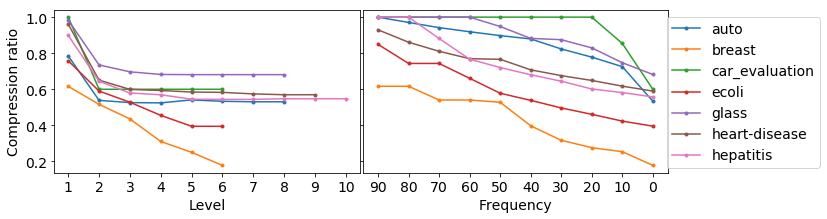

In [205]:
df = pd.read_csv('./results/gradual_characteristics.csv',  index_col=0)
data_name = sorted(df.data_name.unique())

f, axes = plt.subplots(1, 2, figsize = (11, 3), sharey = True)

df_levels = df[df.type == 'level']
for dname in first_datasets:
    df_temp = df_levels[df_levels.data_name == dname]
    axes[0].plot(df_temp.threshold, df_temp.CR, label = dname, marker = '.')
axes[0].set_ylabel('Compression ratio', fontsize = 14)
axes[0].set_xlabel('Level', fontsize = 14)
axes[0].set_xticks(np.arange(1, 11))
axes[0].tick_params(axis='both', which='major', labelsize=14)


df_frequency = df[df.type == 'frequency']
for dname in first_datasets:
    df_temp = df_frequency[df_frequency.data_name == dname]
    axes[1].plot(df_temp.threshold, df_temp.CR, label = dname, marker = '.')
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].set_xlabel('Frequency', fontsize = 14)
axes[1].set_xlim(95, -5)
axes[1].set_xticks(np.arange(90, -1, -10))
axes[1].legend(loc='upper right', bbox_to_anchor=(1.52, 1.), fontsize = 14)
plt.subplots_adjust(wspace=.01, hspace = 0.02)

plt.savefig('./figures/compression_ratio1.png', transparent = True, bbox_inches='tight',  pad_inches=0.1)
plt.show()

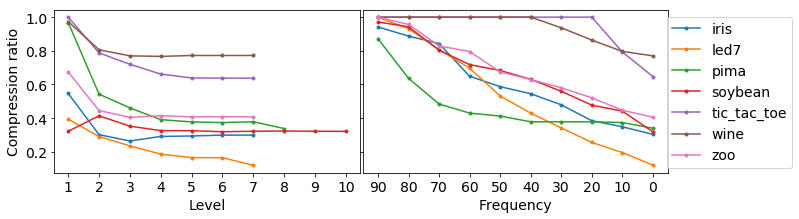

In [172]:
df = pd.read_csv('./results/gradual_characteristics.csv',  index_col=0)
data_name = sorted(df.data_name.unique())

f, axes = plt.subplots(1, 2, figsize = (11, 3), sharey = True)

df_levels = df[df.type == 'level']
for dname in second_datasets:
    df_temp = df_levels[df_levels.data_name == dname]
    axes[0].plot(df_temp.threshold, df_temp.CR, label = dname, marker = '.')
axes[0].set_ylabel('Compression ratio', fontsize = 14)
axes[0].set_xlabel('Level', fontsize = 14)
axes[0].set_xticks(np.arange(1, 11))
axes[0].tick_params(axis='both', which='major', labelsize=14)


df_frequency = df[df.type == 'frequency']
for dname in second_datasets:
    df_temp = df_frequency[df_frequency.data_name == dname]
    axes[1].plot(df_temp.threshold, df_temp.CR, label = dname, marker = '.')
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].set_xlabel('Frequency', fontsize = 14)
axes[1].set_xlim(95, -5)
axes[1].set_xticks(np.arange(90, -1, -10))
axes[1].legend(loc='upper right', bbox_to_anchor=(1.43, 1.), fontsize = 14)

plt.subplots_adjust(wspace=.01, hspace = 0.02)
plt.savefig('./figures/compression_ratio2.png', transparent = True, bbox_inches='tight',  pad_inches=0.1)
plt.show()

# Supervised settings

In [183]:
data_list = ['auto', 'breast', 'car_evaluation', 'ecoli', 'glass', 'heart-disease', 'hepatitis', 'iris', 'led7', 'pima', 'soybean', 'tic_tac_toe', 'wine', 'zoo']

## F1 measure

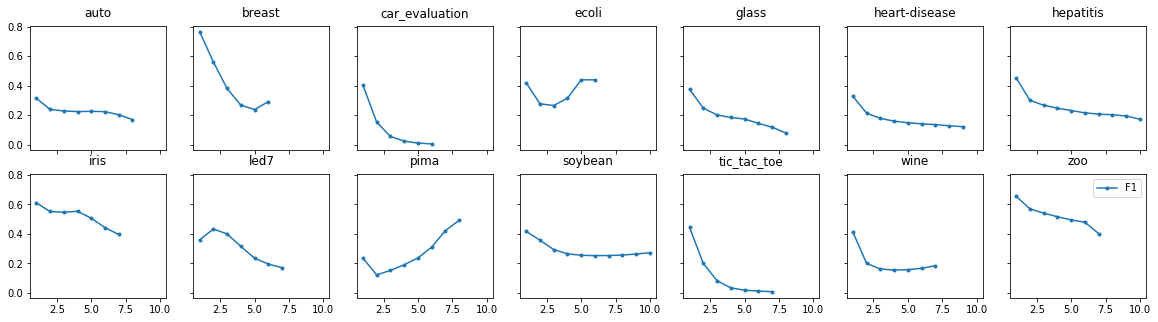

In [196]:
f, axes = plt.subplots(2, int(len(data_list) / 2), figsize = (20, 5), sharey = True, sharex = True)

for i, data_name in enumerate(data_list):
    
    column_id= int(i % 7)
    row_id = int(i / 7)
    folder_name = '../CLA_2020/results/closed_itemsets/' + data_name + '/'
    df = pd.read_csv(folder_name + 'performance.csv', decimal=',', sep = ';', index_col= False)
    accuracy = (df.tp + df.tn) / (df.tp + df.tn + df.fn + df.fp)  
    axes[row_id, column_id].plot(df.level, df.f1, label = 'F1', marker = '.')   
    #axes[row_id, column_id].plot(df.level, df.precision, label = 'PR', marker = '.')
    #axes[row_id, column_id].plot(df.level, df.recall, label = 'RC', marker = '.')
    #axes[row_id, column_id].plot(df.level, accuracy, label = 'ACC', marker = '.')
    axes[row_id, column_id].set_title(data_name, fontdict = {'verticalalignment': 'bottom'})
    
plt.legend()

## Commulative precision

In [227]:
first_datasets  = [ 'breast',  'ecoli', 'iris', 'led7','wine', 'zoo']
second_datasets = ['auto', 'car_evaluation', 'glass', 'heart-disease', 'hepatitis',  'pima', 'tic_tac_toe', 'soybean', ]

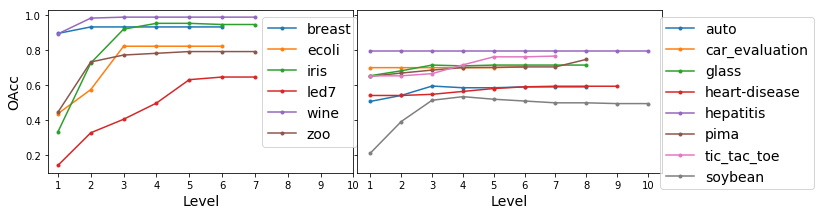

In [230]:

df = pd.read_csv('./results/precision.csv', index_col=0)
data_name = sorted(df.data_name.unique())
#df_single = df[df.type == 'single']
df_commulative = df[df.type == 'commulative']

f, axes = plt.subplots(1, 2, figsize = (11, 3), sharey = True)

df_levels = df[df.type == 'level']
for dname in first_datasets:
    df_temp = df_commulative[df_commulative.data_name == dname]
    axes[0].plot(df_temp.num_level, df_temp.accuracy, label = dname, marker = '.')
axes[0].set_ylabel('OAcc', fontsize = 14)
axes[0].set_xlabel('Level', fontsize = 14)
axes[0].set_xticks(np.arange(1, 11))
axes[0].legend(fontsize = 14,  loc='upper right', bbox_to_anchor=(1.035, 1.))

for dname in second_datasets:
    df_temp = df_commulative[df_commulative.data_name == dname]
    axes[1].plot(df_temp.num_level, df_temp.accuracy, label = dname, marker = '.')
axes[1].set_xlabel('Level', fontsize = 14)
axes[1].set_xticks(np.arange(1, 11))


axes[1].set_xticks(np.arange(1, 11))
axes[1].legend(loc='upper right', bbox_to_anchor=(1.52, 1.),fontsize = 14)

plt.subplots_adjust(wspace=.01, hspace = 0.01)
plt.savefig('./figures/oacc.png', transparent = True, bbox_inches='tight',  pad_inches=0.1)
plt.show()